# **Setting & Introduction**

## **1. Github 연동**

In [1]:
""" github 연동 """
# !git clone https://github.com/ku-sungsukim/2025-LGElec-Day4.git ### colab 사용시

' github 연동 '

## **2. 조교소개**

In [2]:
""" 장표 보여주기용 패키지 Load """
from IPython.display import Image

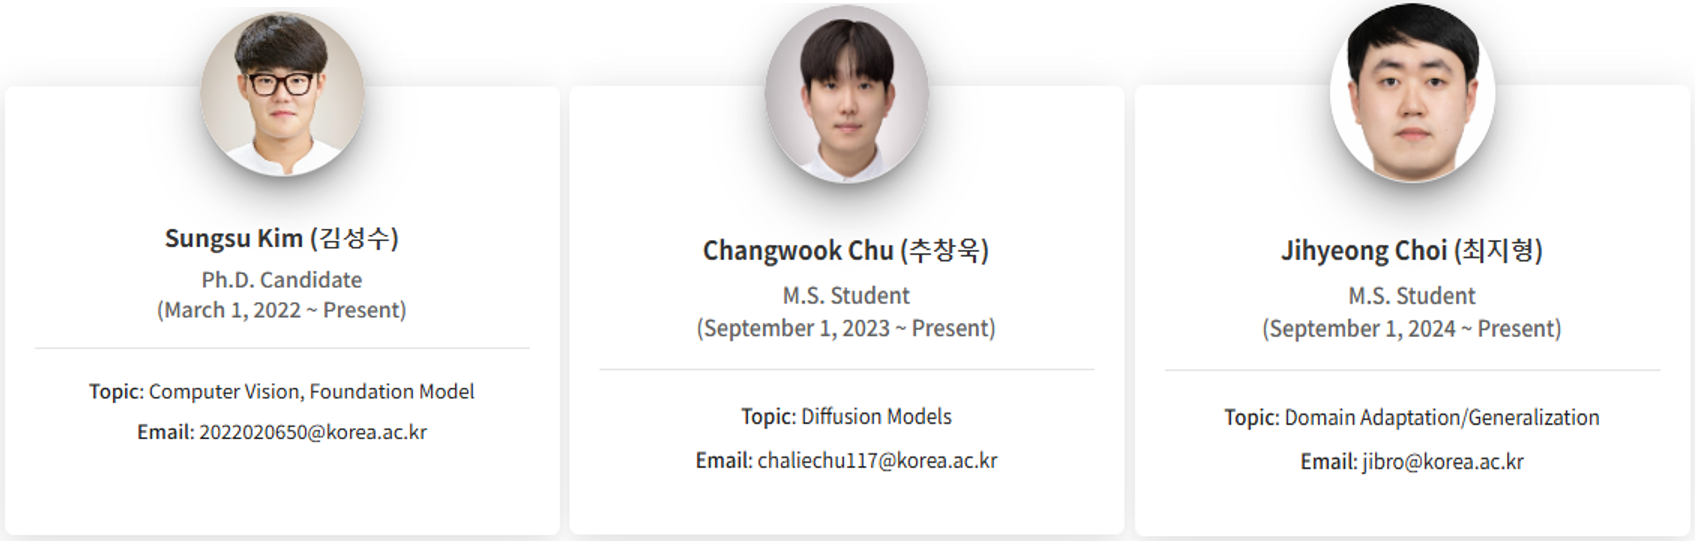

In [3]:
""" 설명 장표 불러오기 """
Image('image/image1.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image1.PNG') ### colab 사용시

## **3. About Jupyter Notebook**

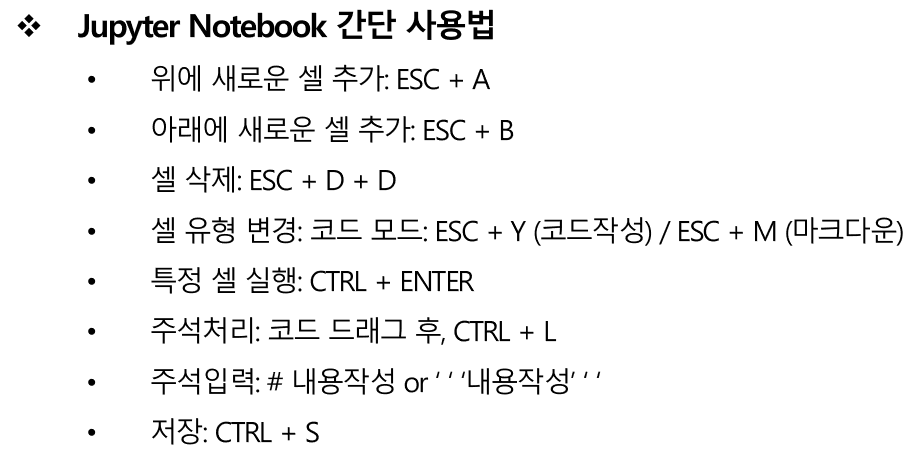

In [4]:
""" 설명 장표 불러오기 """
Image('image/image2.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image2.PNG') ### colab 사용시

# **실습**

#### **1. 데이터 불러오기 및 전처리**
 - 데이터 개요파악 및 전처리 

 - 탐색적 데이터 분석

 - 학습/평가데이터 분할

#### **2. 모델링**
 - 구간평균법

 - 단순지수평활법

 - 이중지수평활법

 - 홀트-윈터 지수평활법

   - Addictive 홀트-윈터 지수평활법
   
   - Multiplicative 홀트-윈터 지수평활법

## **0. 필요 패키지 불러오기**

In [5]:
"""
패키지 불러오기

style1: import warnings
 - warnings 패키지를 불러온다.
 
style2: import pandas as pd
 - pandas 패키지를 불러온다. 또한 추후 pandas를 pd로 줄여서 활용하겠다.
 
style3: from sklearn.linear_model import LinearRegression
 - sklearn.linear_model에서 LinearRegression 함수를 불러온다.
"""


""" 데이터 전처리 관련 패키지 """
import pandas as pd
import numpy as np


""" 기계학습 모델 구축 및 평가 패키지 """
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true).reshape(-1), np.array(y_pred).reshape(-1)
    return np.mean(np.abs((y_true-y_pred)/y_true)) * 100


""" 데이터 시각화 패키지 """
import matplotlib.pyplot as plt
%matplotlib inline


""" 경고 숨기기 """
import warnings
warnings.filterwarnings(action='ignore') 

## **1. 데이터 불러오기 및 전처리**
 - 분석데이터: CO2 데이터 (주간 이산화탄소 배출량 데이터)

#### **1-1. 데이터 개요 파악 및 전처리**

In [6]:
""" 데이터 불러오기 """

"""
데이터 개요
 - 관측치 개수: 2,225개
 - 변수 개수: 7개
 
주요 변수 정보
 - year: 해당 일자 (년) 
 - month: 해당 일자 (월)
 - day: 해당 일자 (일)
 - co2: 해당 일자의 이산화탄소 배출량
"""

co2_data = pd.read_csv('data/co2.csv') ### 로컬 사용시
# co2_data = pd.read_csv('/content/2025-LGElec-Day4/data/co2.csv') ### colab 사용시

co2_data

,year,month,day,weight,flag,station,co2
0,1958.0,3.0,29.0,4.0,0.0,MLO,316.1
1,1958.0,4.0,5.0,6.0,0.0,MLO,317.3
2,1958.0,4.0,12.0,4.0,0.0,MLO,317.6
3,1958.0,4.0,19.0,6.0,0.0,MLO,317.5
4,1958.0,4.0,26.0,2.0,0.0,MLO,316.4
...,...,...,...,...,...,...,...
2220,2001.0,12.0,1.0,7.0,0.0,MLO,370.3
2221,2001.0,12.0,8.0,7.0,0.0,MLO,370.8
2222,2001.0,12.0,15.0,7.0,0.0,MLO,371.2
2223,2001.0,12.0,22.0,6.0,0.0,MLO,371.3


In [7]:
""" 필요 변수 필터링 """
co2_data = co2_data[['year', 'month', 'day', 'co2']]
co2_data

,year,month,day,co2
0,1958.0,3.0,29.0,316.1
1,1958.0,4.0,5.0,317.3
2,1958.0,4.0,12.0,317.6
3,1958.0,4.0,19.0,317.5
4,1958.0,4.0,26.0,316.4
...,...,...,...,...
2220,2001.0,12.0,1.0,370.3
2221,2001.0,12.0,8.0,370.8
2222,2001.0,12.0,15.0,371.2
2223,2001.0,12.0,22.0,371.3


In [8]:
""" 시계열 속성을 반영하기 위해 날짜 변수 생성 """

"""
년/월/일을 병합하여 'date'변수 생성
 - year, month, day 변수 활용
"""

co2_data['date'] = pd.to_datetime(co2_data[['year', 'month', 'day']]) 
co2_data = co2_data.drop(['year', 'month', 'day'], axis=1)
co2_data

,co2,date
0,316.1,1958-03-29
1,317.3,1958-04-05
2,317.6,1958-04-12
3,317.5,1958-04-19
4,316.4,1958-04-26
...,...,...
2220,370.3,2001-12-01
2221,370.8,2001-12-08
2222,371.2,2001-12-15
2223,371.3,2001-12-22


In [9]:
""" date 변수를 index로 지정 """

"""
data.asfreq('W-SAT') 적용 시, 1958-03-29 ~ 2001-12-29 내 모든 토요일 시점을 데이터화
 - 기존 데이터: 토요일 데이터지만, 중간 중간에 빈 토요일 존재 --> 해당 기간 내 모든 토요일 시점을 고려해보자.
 - Row개수 변화: 2,225개 --> 2,284개 (59개 증가) 
"""

data = co2_data.set_index('date') ### index를 date 변수로 지정
data = data.asfreq('W-SAT') ### 전체 기간 내 모든 토요일을 기준으로 재배치 
data

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


In [10]:
""" 데이터 결측치 여부 확인 """
data.isnull().sum()

co2    59
dtype: int64

In [11]:
""" 결측치 대체 """

"""
method
 - bfill: 이전 시점값을 활용하여 대체
 - ffill: 다음 시점값을 활용하여 대체
"""
 
data = data.fillna(method='bfill')
data.isnull().sum()

co2    0
dtype: int64

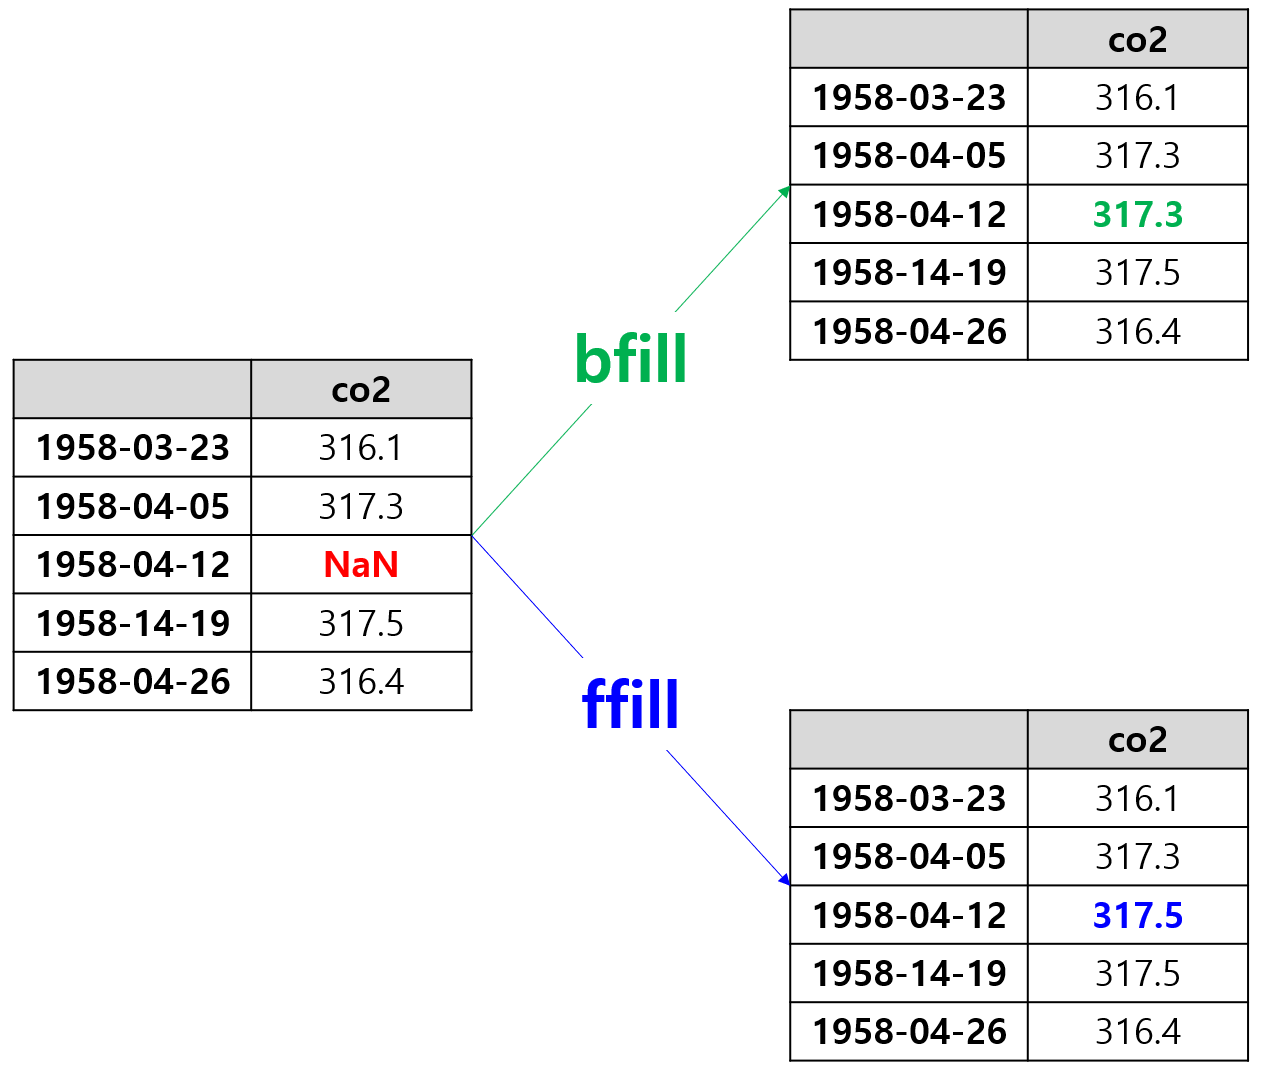

In [12]:
""" 설명 장표 불러오기 """
Image('image/image992.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image992.PNG') ### colab 사용시

#### **1-2. 탐색적 데이터 분석**

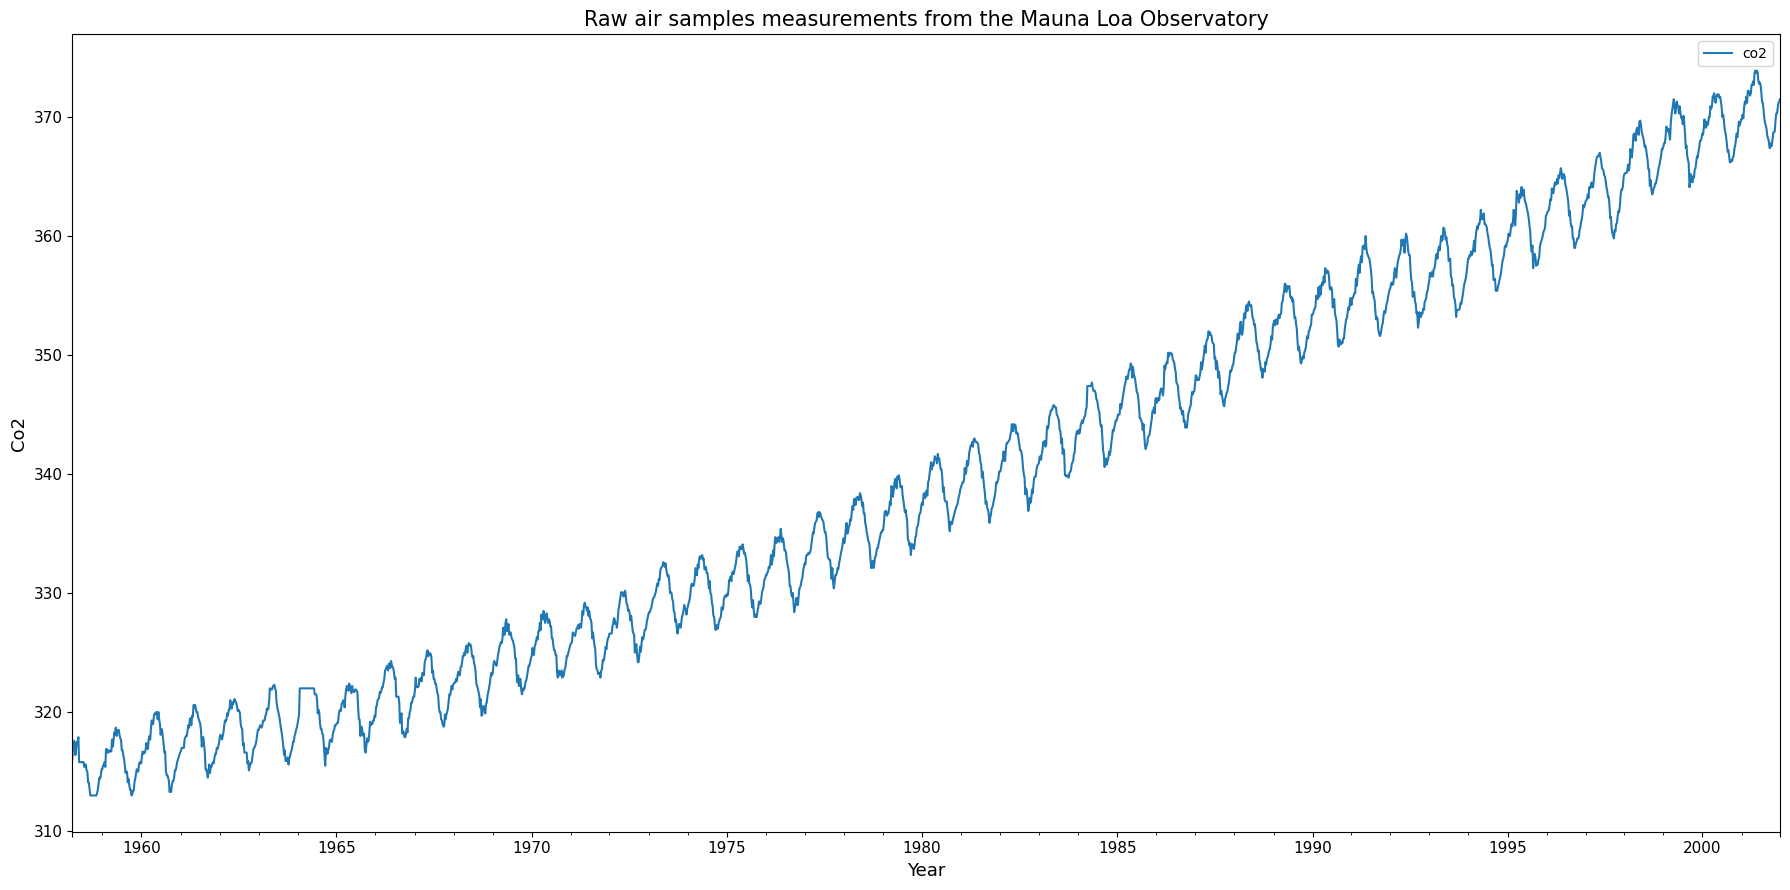

In [13]:
""" 탐색적 데이터 분석: 데이터 시각화를 통해 시계열 형태 확인 """
data.plot(figsize=(18, 9)) 

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.title('Raw air samples measurements from the Mauna Loa Observatory', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Co2', fontsize=13)
plt.tight_layout()
plt.show()

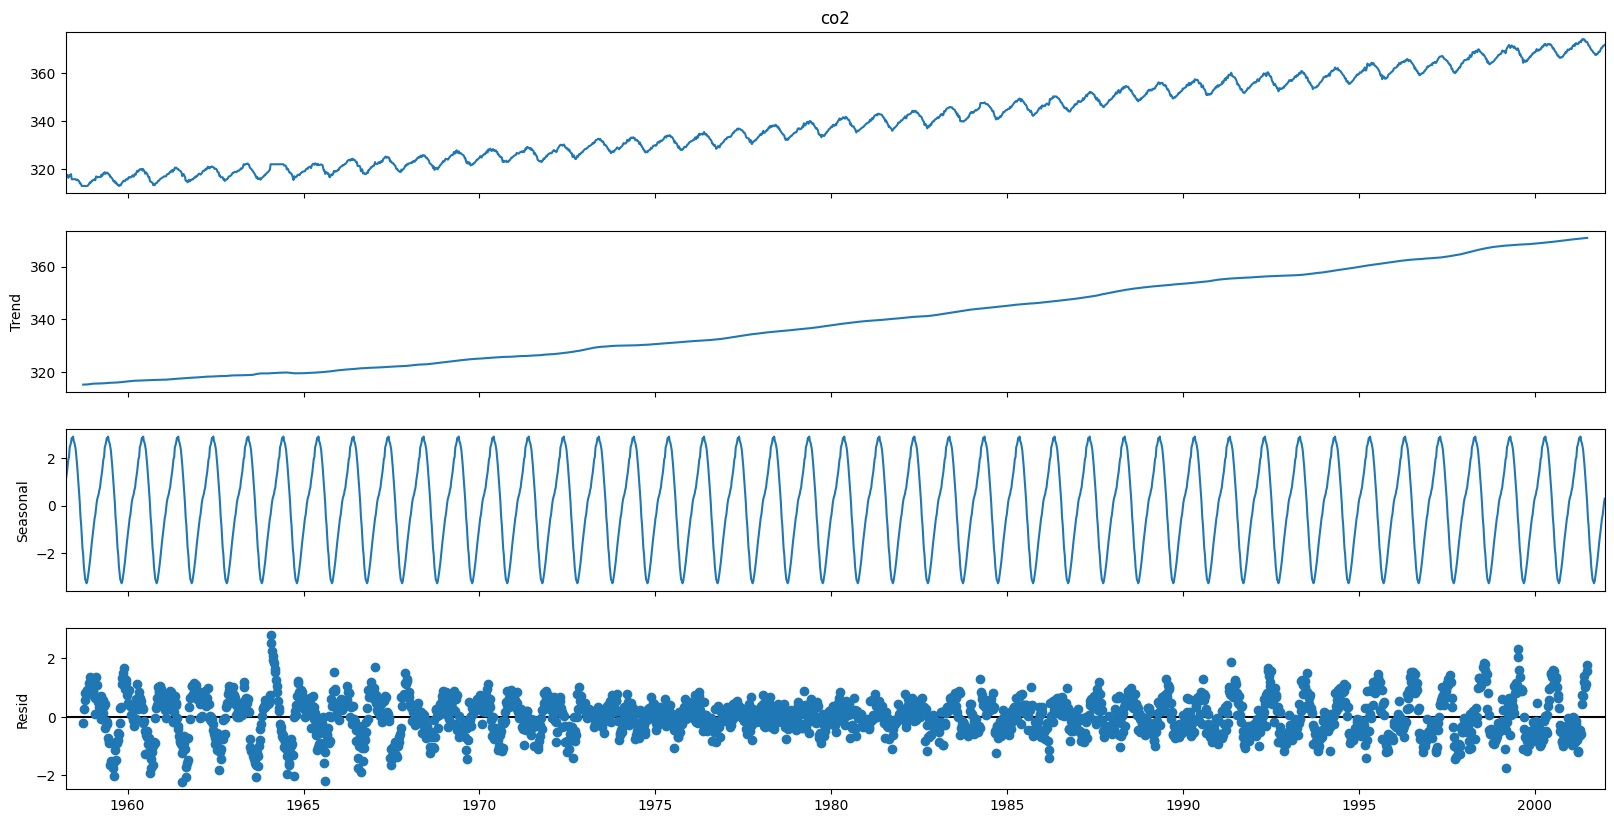

In [14]:
""" 탐색적 데이터 분석: 시계열 분해 """

"""
시계열 데이터 구성: 추세(Trend)변동 + 계절(Seasonal)변동 + 우연(Random)변동
 - 추세: 증가하는 추세
 - 계절: 계절변동 산포 일정
 - 우연: 그 외 설명 불가능한 변동
 
 https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
"""

decompostion = sm.tsa.seasonal_decompose(data['co2'],  model='additive') ### 시계열 분해

fig = decompostion.plot() ### 시계열 분해 시각화
fig.set_size_inches(18, 9) ### Figure 사이즈 지정
plt.show()

#### **1-3. 학습/평가 데이터 분할**

In [15]:
""" 학습/평가데이터 분할 """

"""
시계열 데이터는 시계열을 기준으로 분할하는 것이 일반적
 - 학습: ~ 1989년 12월 (약 70%)
 - 평가: 1990년 1월 ~ (약 30%)
"""

train = data[:'1989-12']
test = data['1990-01':]

train.shape, test.shape

((1658, 1), (626, 1))

## **2. 모델링**

#### **2-1. 구간평균법**

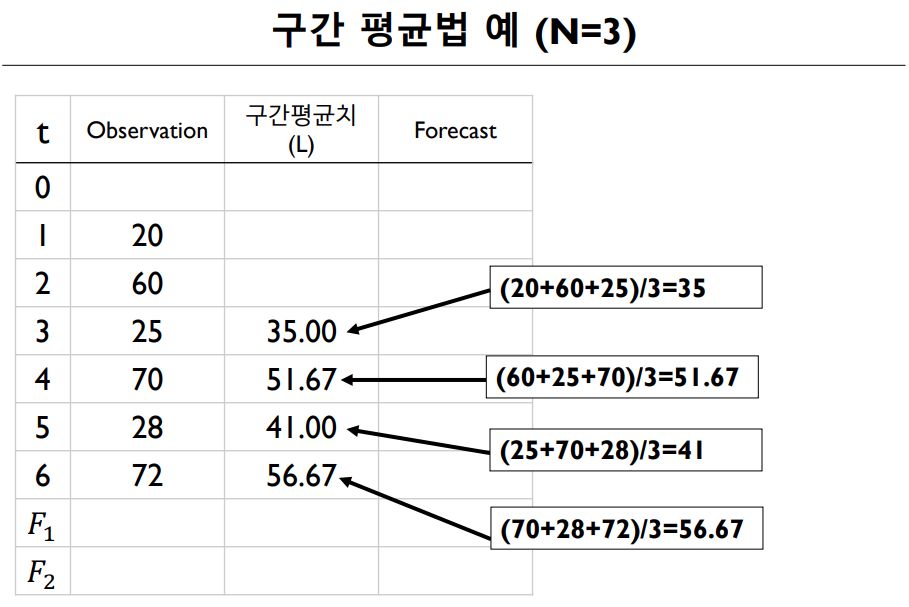

In [16]:
""" 설명 장표 불러오기 """
Image('image/image3.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image3.PNG') ### colab 사용시

In [17]:
""" 학습데이터로 구간평균법 모델링 """

"""
이전 N시점의 평균으로 해당 시점값 예측
 - np.convolve: sliding window 방식으로 특정 시계열 길이만큼 convolution 연산 수행
 - 이때, 가중치를 모두 동일하게 가져가서 평균처럼 연산 (np.ones(N) / float(N))
"""

MA_N = 5
MA_train_flatten = train.values.flatten()
MA_train_pred = np.convolve(MA_train_flatten, np.ones(MA_N) / MA_N, 'valid') ### 구간평균법 연산
MA_train_pred

array([316.98, 317.14, 317.18, ..., 351.9 , 352.08, 352.48])

In [18]:
""" 구간평균법 결과 확인 """
print(f'Original: {MA_train_flatten}')
print(f'MA: {MA_train_pred}')
print('Original: ', MA_train_flatten.shape, 'MA: ', MA_train_pred.shape)

Original: [316.1 317.3 317.6 ... 352.4 352.5 353.4]
MA: [316.98 317.14 317.18 ... 351.9  352.08 352.48]
Original:  (1658,) MA:  (1654,)


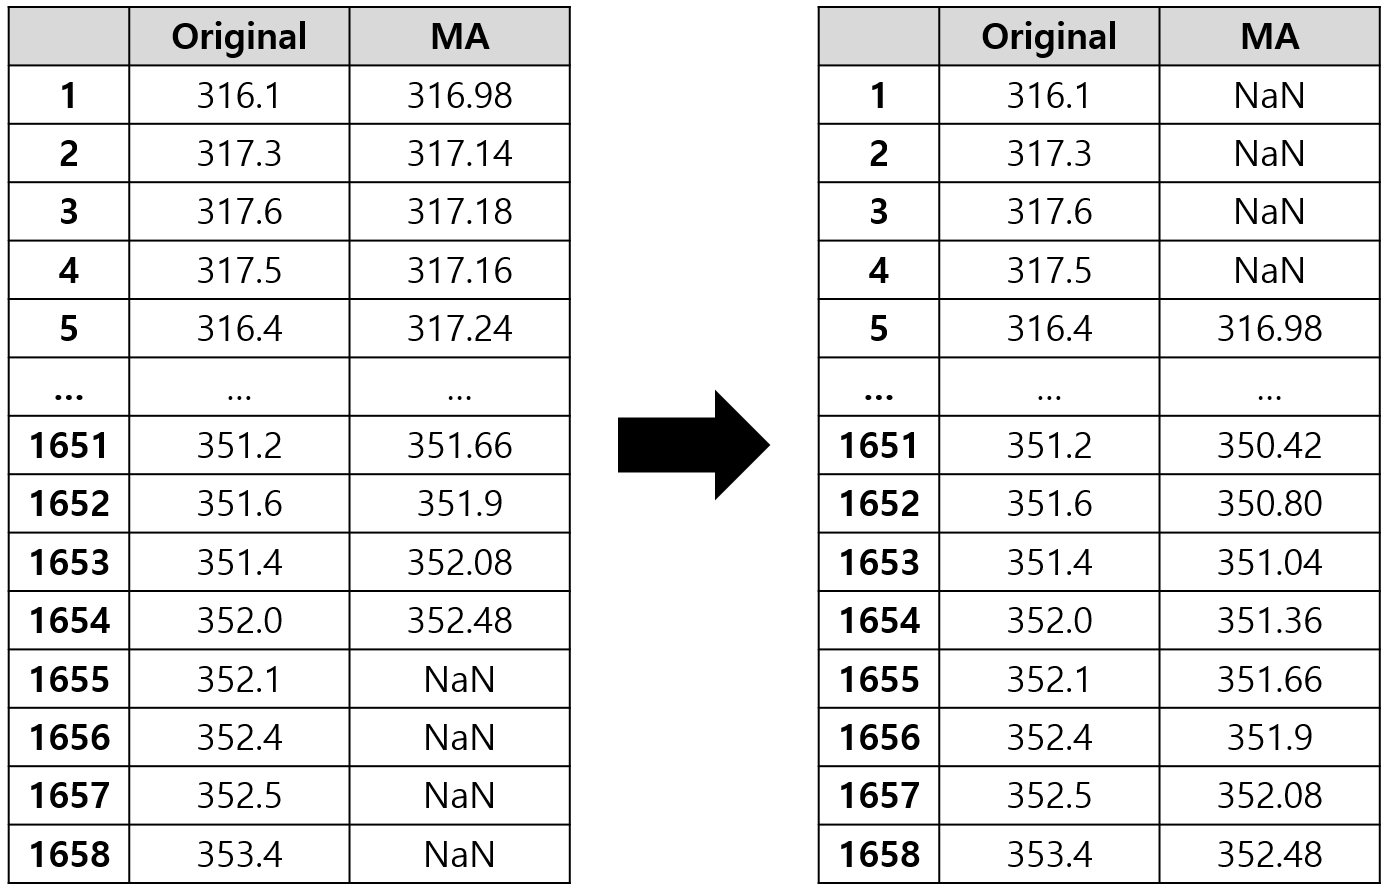

In [19]:
""" 설명 장표 불러오기 """
Image('image/image990.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/imag90.PNG') ### colab 사용시

In [20]:
""" 후처리: 예측될 수 없는 최초 (N-1)시점값은 Nan으로 처리 """
 
"""
구간평균법 특성상 (N-1)개의 최초 값들은 예측할 수 없음
 - 임의로 (N-1)길이의 Nan 배열을 생성
 - 해당 배열과 기존 구간평균법 Prediciton 배열을 합침
"""

MA_before_value = np.empty((MA_N-1)) ### ((MA_N - 1) 크기의 빈 배열 생성
MA_before_value[:] = np.nan ### 빈 배열을 np.nan으로 채우기
MA_train_pred = np.concatenate((MA_before_value, MA_train_pred), axis=0) ### 구간평균법으로 구성 불가능한 부분 & 구간평균법으로 구성한 부분 병합
MA_train_pred

array([   nan,    nan,    nan, ..., 351.9 , 352.08, 352.48])

In [21]:
""" 학습데이터 결과 요약 """
MA_train_df = pd.DataFrame(MA_train_pred, index=train.index, columns=[f'MA_{MA_N}'])
MA_train_df = pd.concat([train, MA_train_df], axis=1)
MA_train_df

,co2,MA_5
date,,
1958-03-29,316.1,NaN
1958-04-05,317.3,NaN
1958-04-12,317.6,NaN
1958-04-19,317.5,NaN
1958-04-26,316.4,316.98
...,...,...
1989-12-02,352.0,351.36
1989-12-09,352.1,351.66
1989-12-16,352.4,351.90


In [22]:
""" 모델링 결과 검증 """
print(f'1958/4/26 Value: {(316.1 + 317.3 + 317.6 + 317.5 + 316.4)/5}')
print(f'1989/12/30 Value: {(352.0 + 352.1 + 352.4 + 352.5 + 353.4)/5}')

1958/4/26 Value: 316.98
1989/12/30 Value: 352.48


In [23]:
""" 구간평균법 Test 기간 예측 """

"""
구간평균법은 train 기간의 마지막 시점 데이터로 Test 기간을 일괄 예측
"""

MA_pred = [MA_train_pred[-1]] * len(test) ### train 기간의 마지막 시점 데이터를 모든 test 기간 예측값으로 할당
MA_test_df = pd.DataFrame(MA_pred, index=test.index, columns=[f'MA_{MA_N}'])
MA_test_df = pd.concat([test, MA_test_df], axis=1)
MA_test_df

,co2,MA_5
date,,
1990-01-06,353.4,352.48
1990-01-13,353.5,352.48
1990-01-20,353.8,352.48
1990-01-27,353.9,352.48
1990-02-03,354.1,352.48
...,...,...
2001-12-01,370.3,352.48
2001-12-08,370.8,352.48
2001-12-15,371.2,352.48


In [24]:
""" 구간평균법 평가 """
print(f'MSE: {np.round(mean_squared_error(test, MA_test_df[f"MA_{MA_N}"]), 2)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test, MA_test_df[f"MA_{MA_N}"])), 2)}')
print(f'MAE: {np.round(mean_absolute_error(test, MA_test_df[f"MA_{MA_N}"]), 2)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(test, MA_test_df[f"MA_{MA_N}"]), 2)}')
print(f'R2 score: {np.round(r2_score(test, MA_test_df[f"MA_{MA_N}"]), 2)}')

MSE: 125.46
RMSE: 11.2
MAE: 9.59
MAPE: 2.62
R2 score: -2.63


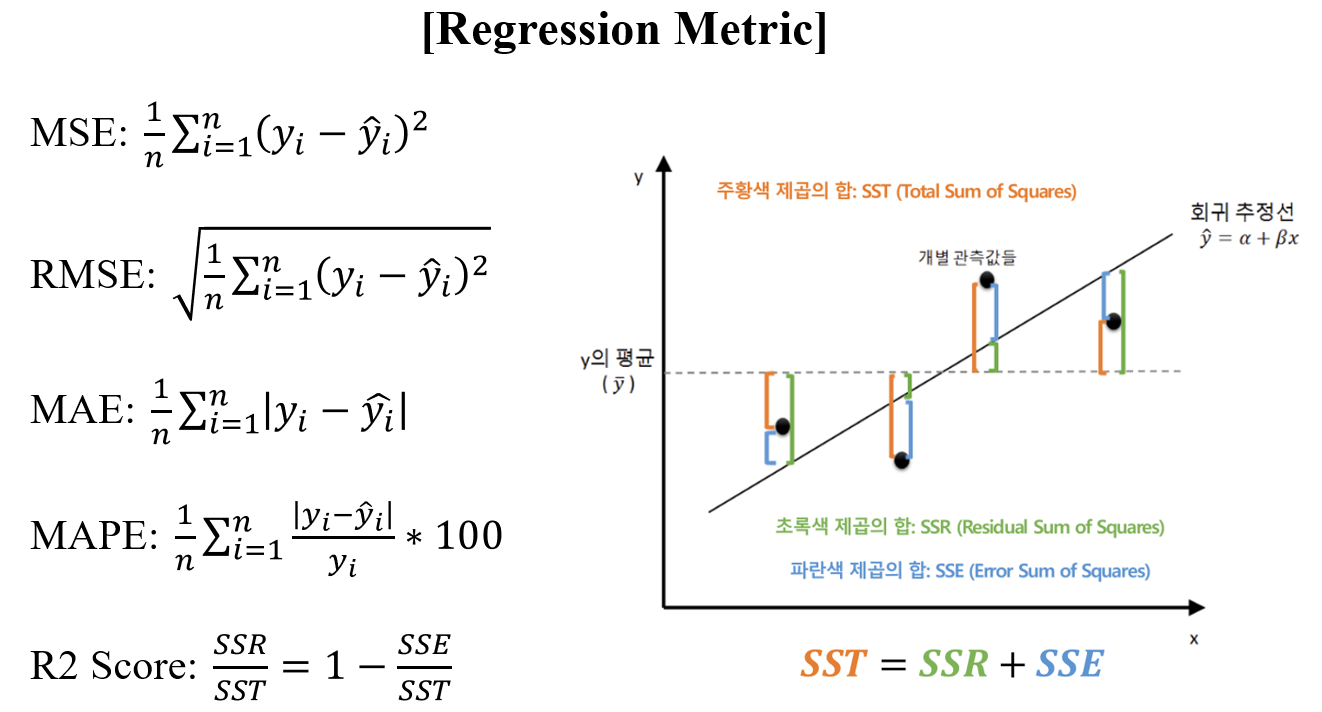

In [25]:
""" 설명 장표 불러오기 """
Image('image/image4.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image4.PNG') ### colab 사용시

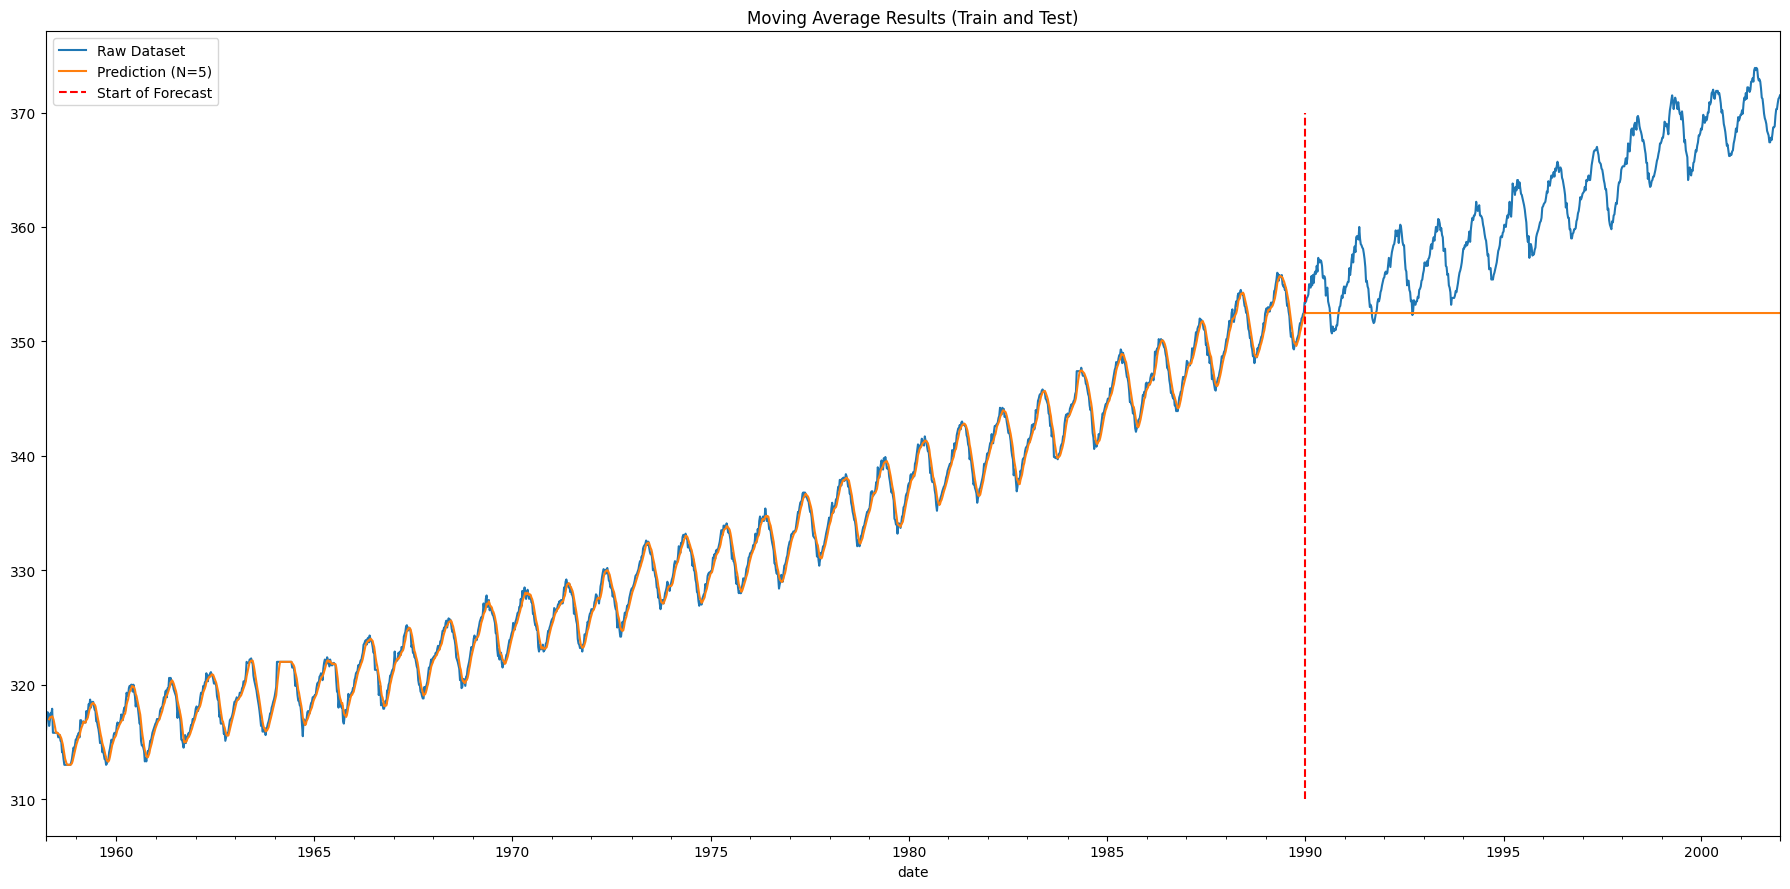

In [26]:
""" 구간평균법 시각화 """
MA_total_visualization_df = pd.concat([MA_train_df, MA_test_df], axis=0) ### train 데이터와 테스트 데이터를 병합

fig, ax = plt.subplots(figsize=(18, 9))
MA_total_visualization_df.plot(ax=ax) ### 구간평균법 예측값 시각화

ax.vlines(test.index[0], ymin=310, ymax=370, linestyle='--', color='r') ### train/test 분리 시점 시각화
ax.legend(['Raw Dataset', 'Prediction (N=5)', 'Start of Forecast'], loc='upper left') ### 범례 지정
plt.title('Moving Average Results (Train and Test)')
plt.tight_layout()
plt.show()

In [27]:
""" Appendix: 학습데이터로 구간평균법 모델링 (Simple Version) """

"""
rolling: 주어진 데이터를 특정길이(MA_N)만큼 묶어 놓은 형태
"""

MA_N = 5

MA_train_df2 = train.rolling(MA_N).mean() 
MA_train_df2.columns = [f'MA_{MA_N}']
MA_train_df2

,MA_5
date,
1958-03-29,NaN
1958-04-05,NaN
1958-04-12,NaN
1958-04-19,NaN
1958-04-26,316.98
...,...
1989-12-02,351.36
1989-12-09,351.66
1989-12-16,351.90


#### **2-2. 단순지수평활법 (Simple Exponential Smoothing)**

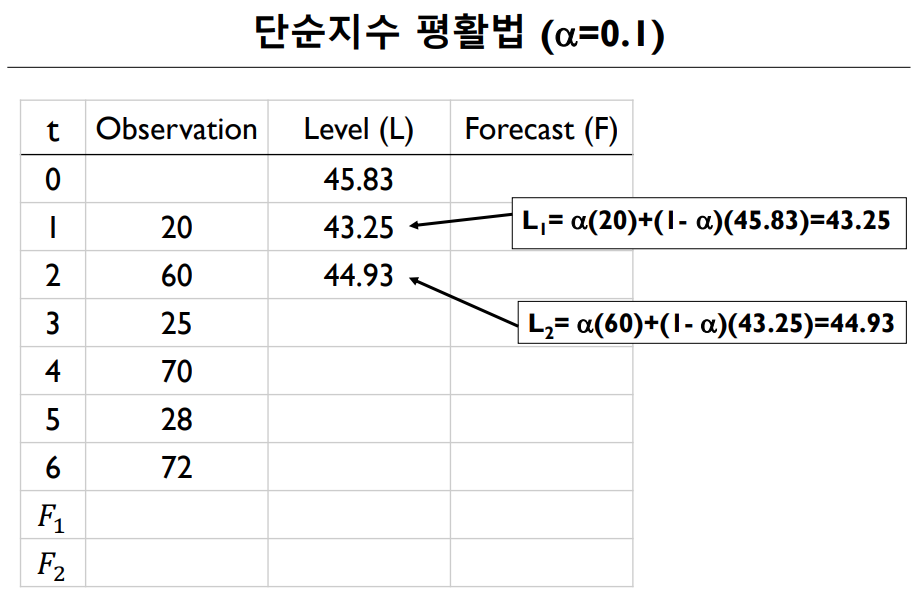

In [28]:
""" 설명 장표 불러오기 """
Image('image/image5.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image5.PNG') ### colab 사용시

In [29]:
""" 단순지수평활법을 위한 Table 초기화 """

""" Step1. 초기값을 위한 Row 생성 """
SES_initial_df = pd.DataFrame([np.nan], index=[0], columns=['co2'])
SES_train_df = pd.concat([SES_initial_df, train], axis=0)

""" Step2. Level 및 Forecast 변수 생성 """
SES_train_df['Level'] = np.nan
SES_train_df['Forecast'] = np.nan

""" Step3. Level의 초기값 지정 (= 모든 Observation의 평균) """
SES_L_0 = np.mean(train)
SES_train_df.loc[0, 'Level'] = SES_L_0
SES_train_df

,co2,Level,Forecast
0,NaN,331.216767,NaN
1958-03-29 00:00:00,316.1,NaN,NaN
1958-04-05 00:00:00,317.3,NaN,NaN
1958-04-12 00:00:00,317.6,NaN,NaN
1958-04-19 00:00:00,317.5,NaN,NaN
...,...,...,...
1989-12-02 00:00:00,352.0,NaN,NaN
1989-12-09 00:00:00,352.1,NaN,NaN
1989-12-16 00:00:00,352.4,NaN,NaN
1989-12-23 00:00:00,352.5,NaN,NaN


In [30]:
""" 학습데이터로 단순지수평활법 모델링 """

"""
단순지수평활법
 - alpha: 0.9
 - alpha * Observation(i) + (1-alpha)*Level(i-1)
"""

SES_alpha = 0.9 ### 단순지수평활법 상수

for i in range(len(SES_train_df)):
    
    if i == 0: ### 초기 Index는 Observation과 무관하므로 수행하지 않음
        continue
    
    SES_current_time = SES_train_df.index[i] ### 현재 시점 Time Index
    SES_previous_time = SES_train_df.index[i-1] ### 이전 시점 Time Index
    
    SES_x = SES_train_df.loc[SES_current_time, 'co2'] ### 현재 시점 Observation
    SES_L_prev = SES_train_df.loc[SES_previous_time, 'Level'] ### 이전 시점 Level
    SES_train_df.loc[SES_current_time, 'Level'] = (SES_alpha)*SES_x + (1-SES_alpha)*SES_L_prev ### 단순지수평활법 적용: a * (현재 시점 Observation) + (1-a) * (이전 시점 Level)
    
SES_train_df

,co2,Level,Forecast
0,NaN,331.216767,NaN
1958-03-29 00:00:00,316.1,317.611677,NaN
1958-04-05 00:00:00,317.3,317.331168,NaN
1958-04-12 00:00:00,317.6,317.573117,NaN
1958-04-19 00:00:00,317.5,317.507312,NaN
...,...,...,...
1989-12-02 00:00:00,352.0,351.941538,NaN
1989-12-09 00:00:00,352.1,352.084154,NaN
1989-12-16 00:00:00,352.4,352.368415,NaN
1989-12-23 00:00:00,352.5,352.486842,NaN


In [31]:
""" 검증 (4월 12일) """
round(317.6*SES_alpha + 317.331168*(1-SES_alpha), 6)

317.573117

In [32]:
""" 단순지수평활법 Test기간 예측 """

"""
단순지수평활법은 구간평균법처럼 train의 마지막 기간값을 모든 test값으로 예측
"""

SES_L_pred = SES_train_df.iloc[-1]['Level'] ### 학습데이터에서 마지막 Level값
SES_test_pred = [SES_L_pred] * len(test) ### 마지막 Level값을 모두 동일하게 적용

SES_test_df = pd.DataFrame(data=SES_test_pred, 
                             index=test.index, 
                             columns=[f'SES_{SES_alpha}'])

SES_test_df

,SES_0.9
date,
1990-01-06,353.308684
1990-01-13,353.308684
1990-01-20,353.308684
1990-01-27,353.308684
1990-02-03,353.308684
...,...
2001-12-01,353.308684
2001-12-08,353.308684
2001-12-15,353.308684


In [33]:
""" 단순지수평활법 평가 """
print(f'MSE: {np.round(mean_squared_error(test, SES_test_df[f"SES_{SES_alpha}"]), 2)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test, SES_test_df[f"SES_{SES_alpha}"])), 2)}')
print(f'MAE: {np.round(mean_absolute_error(test, SES_test_df[f"SES_{SES_alpha}"]), 2)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(test, SES_test_df[f"SES_{SES_alpha}"]), 2)}')
print(f'R2 score: {np.round(r2_score(test, SES_test_df[f"SES_{SES_alpha}"]), 2)}')

MSE: 110.34
RMSE: 10.5
MAE: 8.82
MAPE: 2.41
R2 score: -2.19


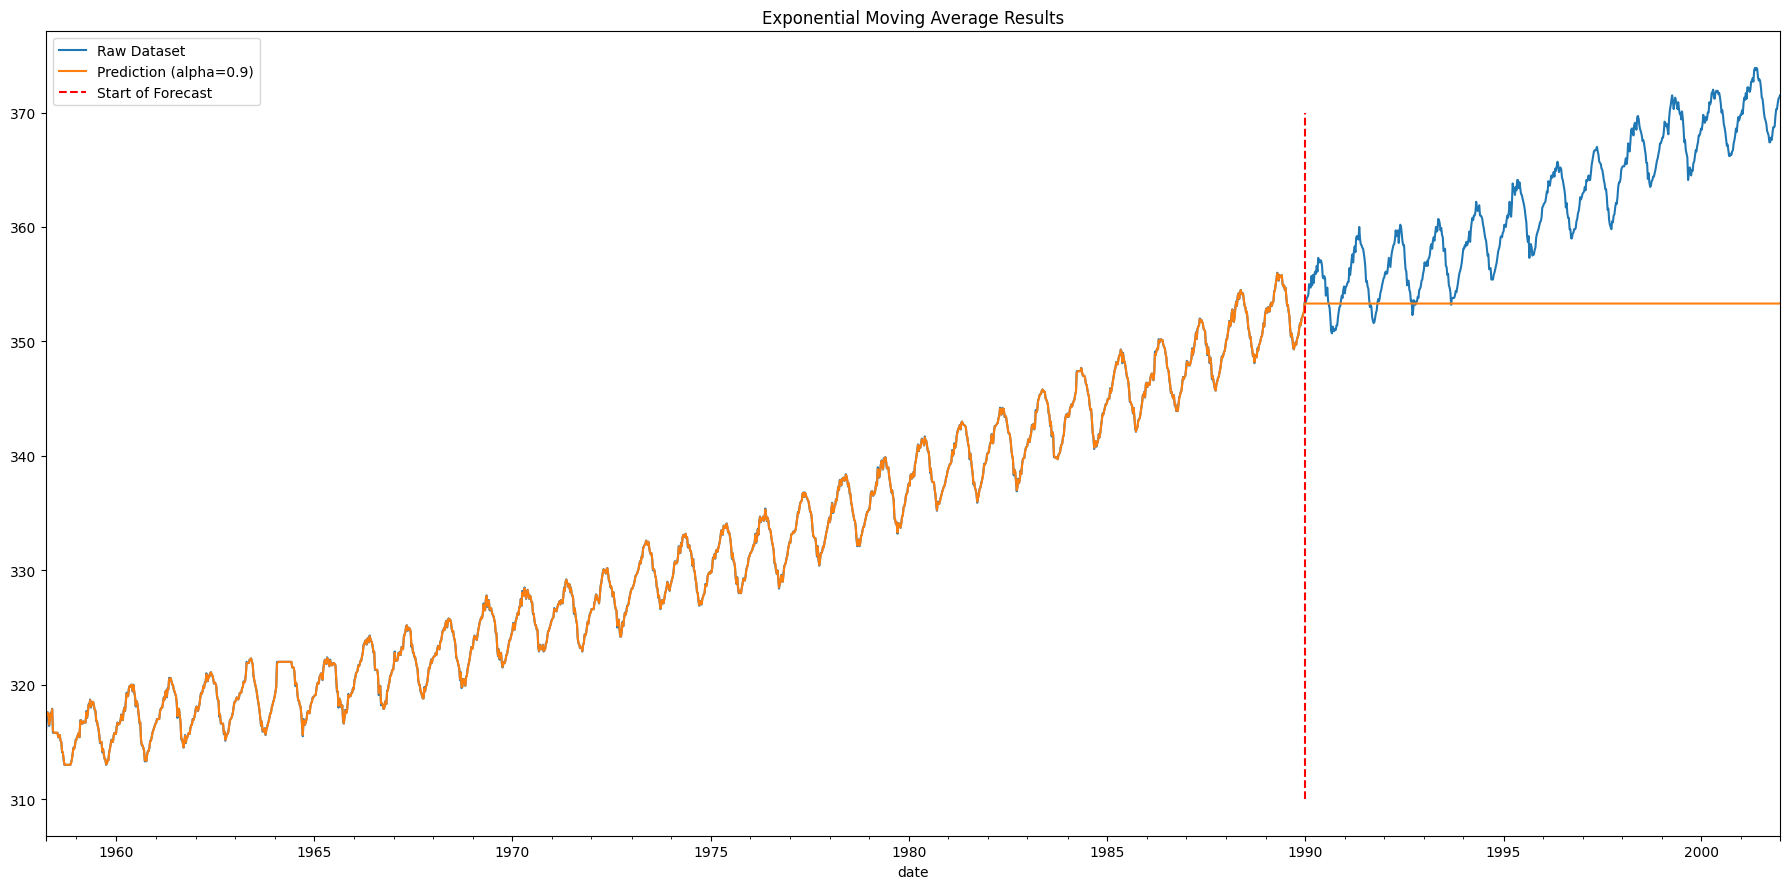

In [34]:
""" 단순지수평활법 시각화 """

""" train 예측값과 test 예측값 종합 """
SES_train_visualization_df = SES_train_df[['Level']]
SES_train_visualization_df = SES_train_visualization_df.rename(columns={'Level':f'SES_{SES_alpha}'}) 

SES_test_visualization_df = SES_test_df.copy()
SES_total_visualization_df = pd.concat([SES_train_visualization_df, SES_test_visualization_df], axis=0).iloc[1:]
SES_total_visualization_df.index = pd.to_datetime(SES_total_visualization_df.index)

""" 시각화 """
fig, ax = plt.subplots(figsize=(18, 9))
data.plot(ax=ax) ### 기존 전체 데이터 시각화
SES_total_visualization_df.plot(ax=ax, label=f'Prediction (alpha={SES_alpha})') ### 단순지수평활법 예측값 시각화

ax.vlines(test.index[0], ymin=310, ymax=370, linestyle='--', color='r') ### train/test 분리 시점 시각화
ax.legend(['Raw Dataset', f'Prediction (alpha={SES_alpha})', 'Start of Forecast'], loc='upper left')
plt.title('Exponential Moving Average Results')
plt.tight_layout()
plt.show()

In [35]:
""" 학습데이터로 단순지수평활법 모델링 (Simple Version) """

""" 
ewm함수를 활용하여 간단하게 구현가능
 - adjust=True: 분모에 모든 가중치의 합이 들어가 정규화 추가적으로 수행
"""

initial_df = pd.DataFrame([SES_L_0], index=[0], columns=['co2'])
SES_train_df2 = pd.concat([initial_df, train], axis=0)
SES_train_df2 = SES_train_df2.ewm(alpha=SES_alpha, adjust=False).mean() ### Exponetial Moving Average --> mean 적용 (var() 등도 적용 가능하나, 이번 실습이랑 무관)
SES_train_df2

,co2
0,331.216767
1958-03-29 00:00:00,317.611677
1958-04-05 00:00:00,317.331168
1958-04-12 00:00:00,317.573117
1958-04-19 00:00:00,317.507312
...,...
1989-12-02 00:00:00,351.941538
1989-12-09 00:00:00,352.084154
1989-12-16 00:00:00,352.368415
1989-12-23 00:00:00,352.486842


#### **2-3. 이중지수평활법**
 - "추세" 반영

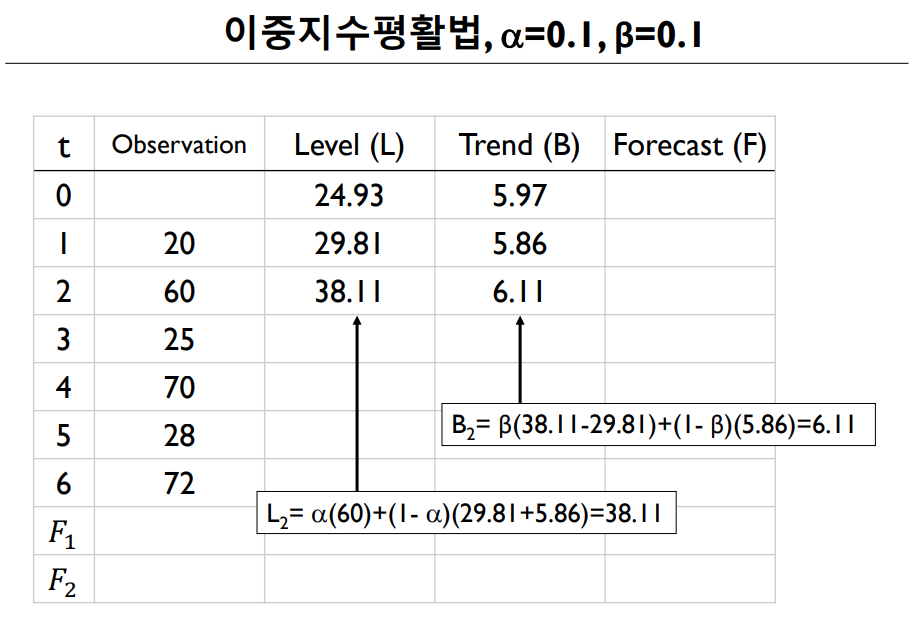

In [36]:
""" 설명 장표 불러오기 """
Image('image/image6.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image6.PNG') ### colab 사용시

In [37]:
""" 이중지수평활법의 초기값 산출 """

""" 
회귀모델을 통해 초기값 산출
 - β0 (y절편): Level의 초깃값
 - β1 (기울기): Trend의 초깃값
"""

DES_reg = train.reset_index()
DES_reg_x = pd.DataFrame(DES_reg.index+1, columns=['time']) ### x변수: time
DES_reg_y = DES_reg['co2'] ### y변수: 실제 y (이산화탄소 배출량)

DES_reg_x = sm.add_constant(DES_reg_x) ### 회귀적합을 위한 상수항 추가
DES_reg_model = sm.OLS(DES_reg_y, DES_reg_x) ### 회귀모형 정의
DES_results = DES_reg_model.fit() ### 회귀모형 파라미터 산출

DES_L_0, DES_B_0 = DES_results.params
print(f'Level의 초기값(β0): {DES_L_0} // Trend의 초기값(β1): {DES_B_0} \n')
print(DES_results.summary())

Level의 초기값(β0): 311.9709300674919 // Trend의 초기값(β1): 0.0232017325158447 

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 3.215e+04
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:21:40   Log-Likelihood:                -3885.3
No. Observations:                1658   AIC:                             7775.
Df Residuals:                    1656   BIC:                             7785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

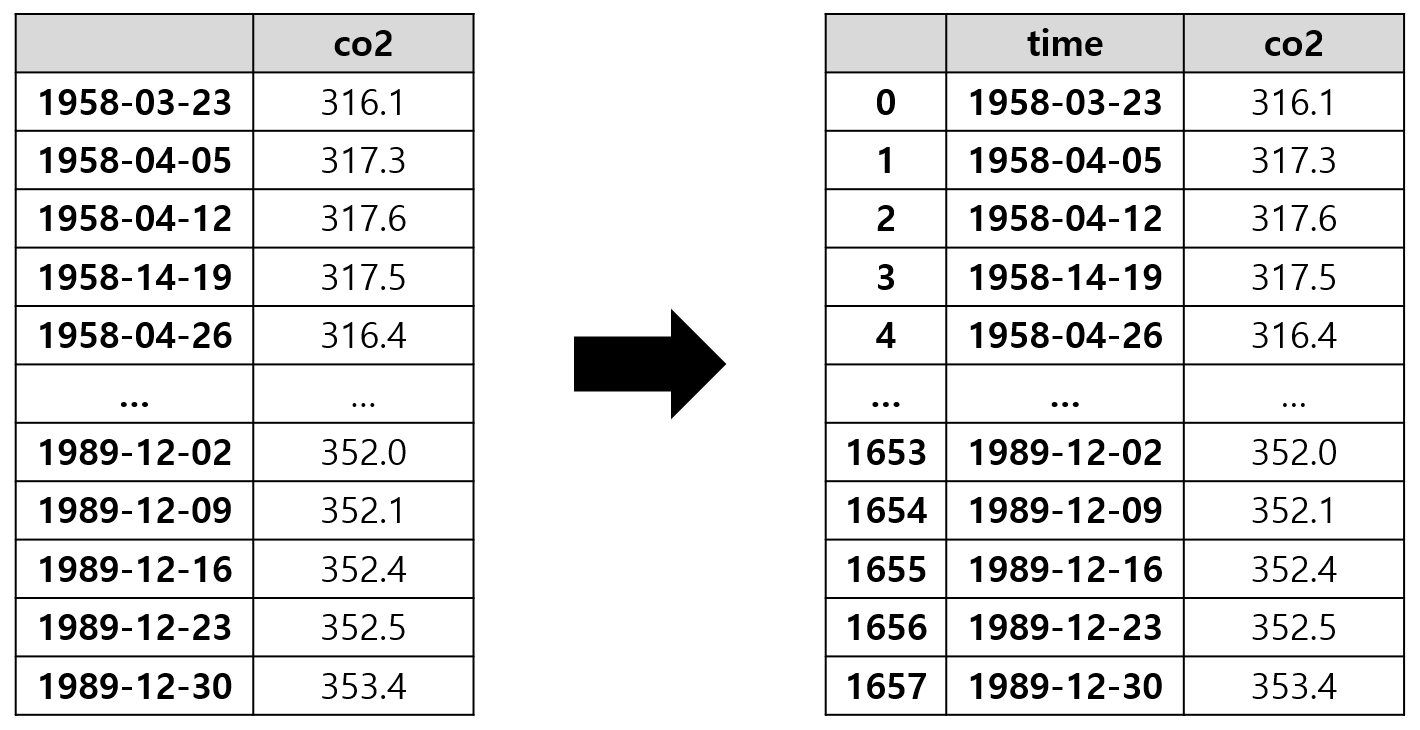

In [38]:
""" 설명 장표 불러오기 """
Image('image/image991.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image991.PNG') ### colab 사용시

In [39]:
""" 이중지수평활법을 위한 Table 초기화 """

""" Step1. 초기값을 위한 Row 생성 """
DES_initial_df = pd.DataFrame(np.zeros(1), index=[0], columns=['co2'])
DES_train_df = pd.concat([DES_initial_df, train], axis=0)

""" Step2. Level / Trend / Forecast 변수 생성 """
DES_train_df['Level'] = np.nan
DES_train_df['Trend'] = np.nan
DES_train_df['Forecast'] = np.nan

""" Step3. Level / Trend의 초기값 지정 --> 회귀계수 활용 """
DES_train_df.loc[0, 'Level'] = DES_L_0
DES_train_df.loc[0, 'Trend'] = DES_B_0

DES_train_df

,co2,Level,Trend,Forecast
0,0.0,311.97093,0.023202,NaN
1958-03-29 00:00:00,316.1,NaN,NaN,NaN
1958-04-05 00:00:00,317.3,NaN,NaN,NaN
1958-04-12 00:00:00,317.6,NaN,NaN,NaN
1958-04-19 00:00:00,317.5,NaN,NaN,NaN
...,...,...,...,...
1989-12-02 00:00:00,352.0,NaN,NaN,NaN
1989-12-09 00:00:00,352.1,NaN,NaN,NaN
1989-12-16 00:00:00,352.4,NaN,NaN,NaN
1989-12-23 00:00:00,352.5,NaN,NaN,NaN


In [40]:
""" 학습데이터로 이중지수평활법 모델링"""
DES_alpha = 0.16 ### 이중지수평활법 상수 (1)
DES_beta = 0.1 ### 이중지수평활법 상수 (2)

for i in range(len(DES_train_df)):
    
    if i == 0: ### 초기 Index는 Observation과 무관하므로 수행하지 않음
        continue
    
    DES_current_time = DES_train_df.index[i] ### 현재시점 Time Index
    DES_previous_time = DES_train_df.index[i-1] ### 이전시점 Time Index

    DES_x = DES_train_df.loc[DES_current_time, 'co2'] ### 현재시점 Observation
    DES_L_prev = DES_train_df.loc[DES_previous_time, 'Level'] ### 이전시점 Level
    DES_T_prev = DES_train_df.loc[DES_previous_time, 'Trend'] ### 이전시점 Trend
    
    DES_train_df.loc[DES_current_time, 'Level'] = DES_alpha*DES_x + (1-DES_alpha)*(DES_L_prev+DES_T_prev) ### 현재시점 Level
    DES_train_df.loc[DES_current_time, 'Trend'] = DES_beta*(DES_train_df.loc[DES_current_time, 'Level']-DES_L_prev) + (1-DES_beta)*(DES_T_prev) ### 현재시점 Trend

DES_train_df

,co2,Level,Trend,Forecast
0,0.0,311.970930,0.023202,NaN
1958-03-29 00:00:00,316.1,312.651071,0.088896,NaN
1958-04-05 00:00:00,317.3,313.469572,0.161856,NaN
1958-04-12 00:00:00,317.6,314.266399,0.225353,NaN
1958-04-19 00:00:00,317.5,314.973072,0.273485,NaN
...,...,...,...,...
1989-12-02 00:00:00,352.0,349.904718,-0.122128,NaN
1989-12-09 00:00:00,352.1,350.153375,-0.085050,NaN
1989-12-16 00:00:00,352.4,350.441394,-0.047743,NaN
1989-12-23 00:00:00,352.5,350.730667,-0.014041,NaN


In [41]:
""" 검증 (4월 12일) """
DES_Level = DES_alpha*317.6 + (1-DES_alpha)*(313.485631+0.161179)
print(f'Level: {round(DES_Level, 6)}')
print(f'Trend: {round(DES_beta*(DES_Level-313.485631) + (1-DES_beta)*0.161179, 6)}')

Level: 314.27932
Trend: 0.22443


In [42]:
""" 이중지수평활법 Test기간 예측 """

"""
이중지수평활법은 train 기간의 마지막 Level값과 Trend값을 활용
 - prediction_i = Level + i*Trend
"""

DES_L_Pred = DES_train_df.iloc[-1]['Level']
DES_T_Pred = DES_train_df.iloc[-1]['Trend']
DES_test_pred = [DES_L_Pred + i*DES_T_Pred for i in range(len(test))]

DES_test_df = pd.DataFrame(data=DES_test_pred, 
                             index=test.index, 
                             columns=['DES'])
DES_test_df

,DES
date,
1990-01-06,351.145965
1990-01-13,351.174858
1990-01-20,351.203751
1990-01-27,351.232643
1990-02-03,351.261536
...,...
2001-12-01,369.088332
2001-12-08,369.117225
2001-12-15,369.146118


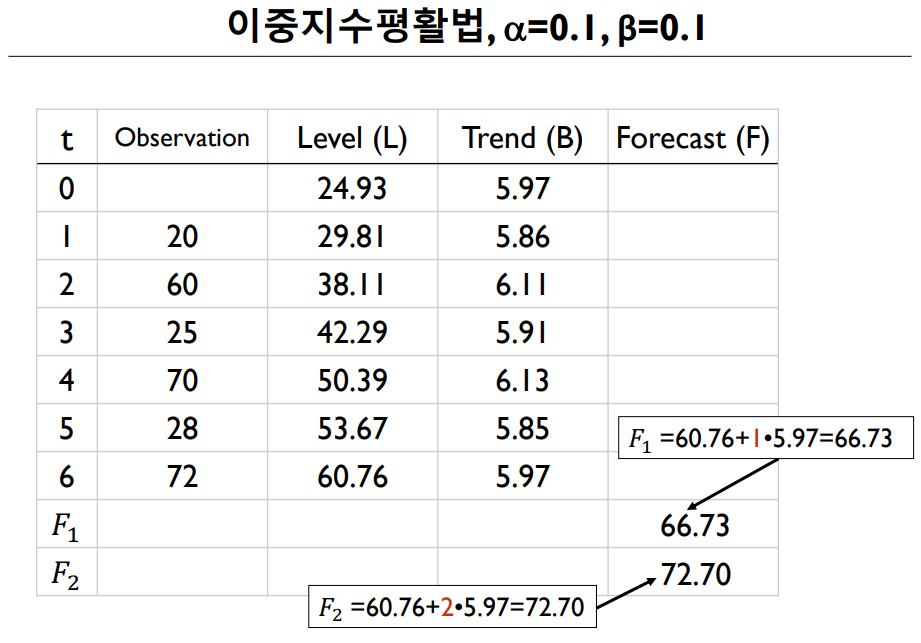

In [43]:
""" 설명 장표 불러오기 """
Image('image/image7.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image7.PNG') ### colab 사용시

In [44]:
""" 이중지수평활법 평가 """
print(f'MSE: {np.round(mean_squared_error(test, DES_test_df["DES"]), 2)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test, DES_test_df["DES"])), 2)}')
print(f'MAE: {np.round(mean_absolute_error(test, DES_test_df["DES"]), 2)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(test, DES_test_df["DES"]), 2)}')
print(f'R2 score: {np.round(r2_score(test, DES_test_df["DES"]), 2)}')

MSE: 8.82
RMSE: 2.97
MAE: 2.5
MAPE: 0.69
R2 score: 0.74


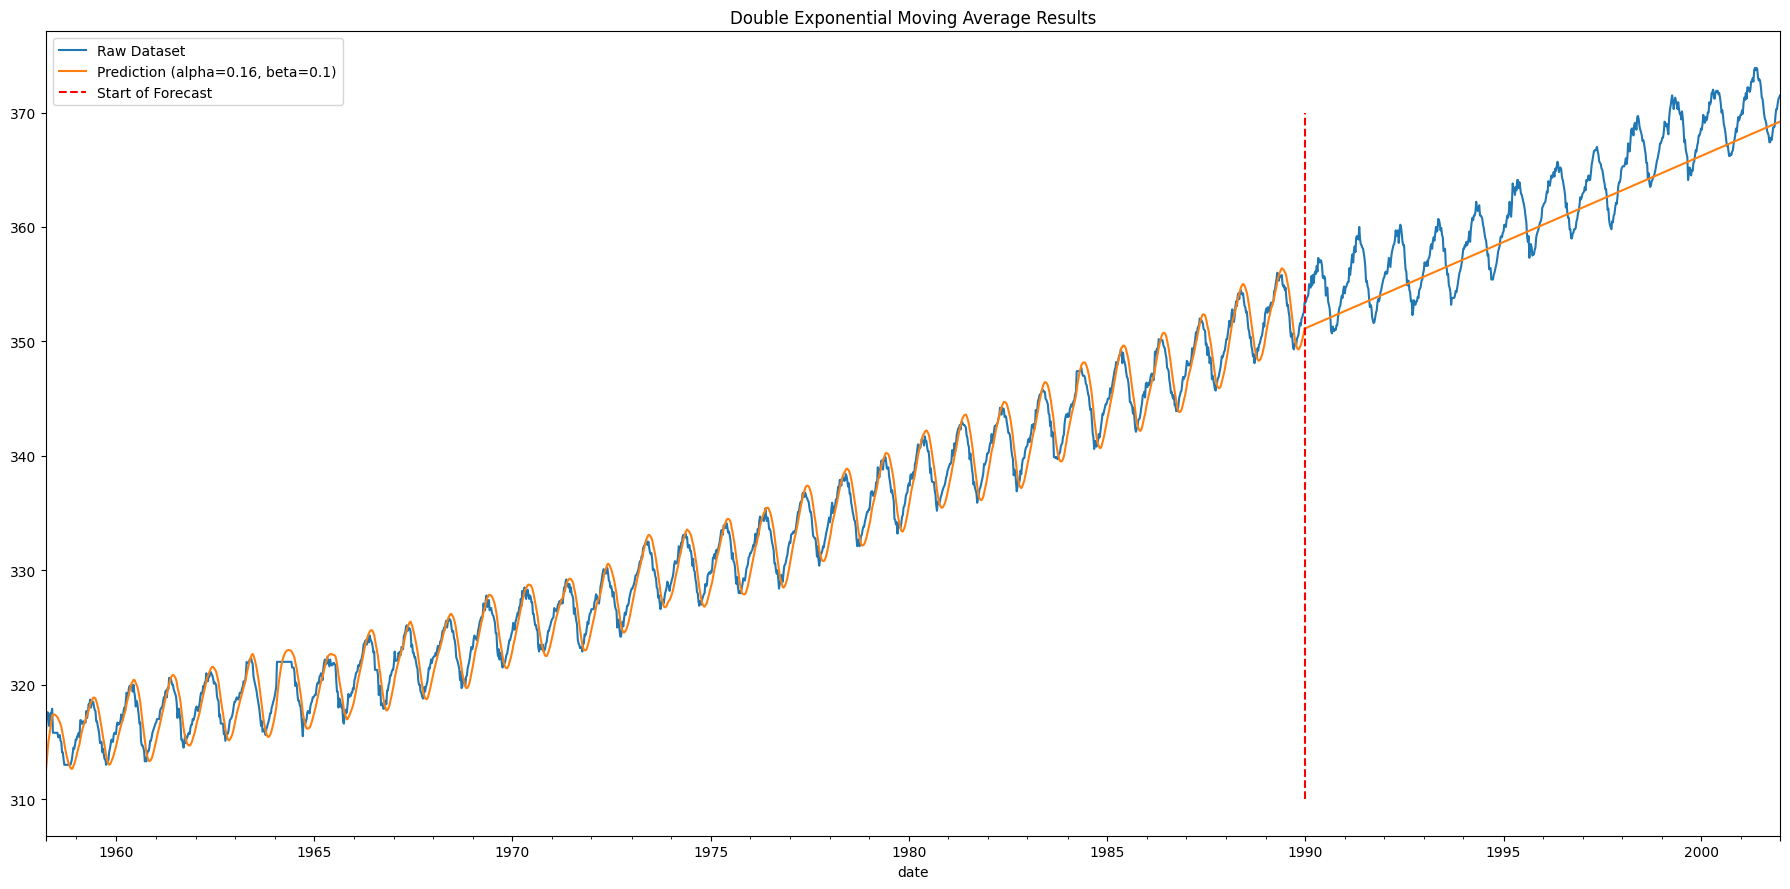

In [45]:
""" 이중지수평활법 시각화 """

""" train 예측값과 test 예측값 종합 """
DES_train_visualization_df = pd.DataFrame(DES_train_df.iloc[1:]['Level']) ### 초기값 제거
DES_train_visualization_df.columns = ['DES']
DES_test_visualization_df = DES_test_df.copy()

DES_total_visualization_df = pd.concat([DES_train_visualization_df, DES_test_visualization_df], axis=0)
DES_total_visualization_df.index = pd.to_datetime(DES_total_visualization_df.index)

""" 시각화 """
fig, ax = plt.subplots(figsize=(18, 9))
data.plot(ax=ax) ### 기존 전체 데이터 시각화
DES_total_visualization_df.plot(ax=ax) ### 이중지수평활법 예측값 시각화

ax.vlines(test.index[0], ymin=310, ymax=370, linestyle='--', color='r') ### train/test 분리 시점 시각화
ax.legend(['Raw Dataset', f'Prediction (alpha={DES_alpha}, beta={DES_beta})', 'Start of Forecast'], loc='upper left')
plt.title('Double Exponential Moving Average Results')
plt.tight_layout()
plt.show()

#### **2-4. 홀트-윈터 지수평활법**

**2-4-1. Addictive 홀트-윈터 지수평활법**
 - "추세 + 계절성(산포일정)" 반영

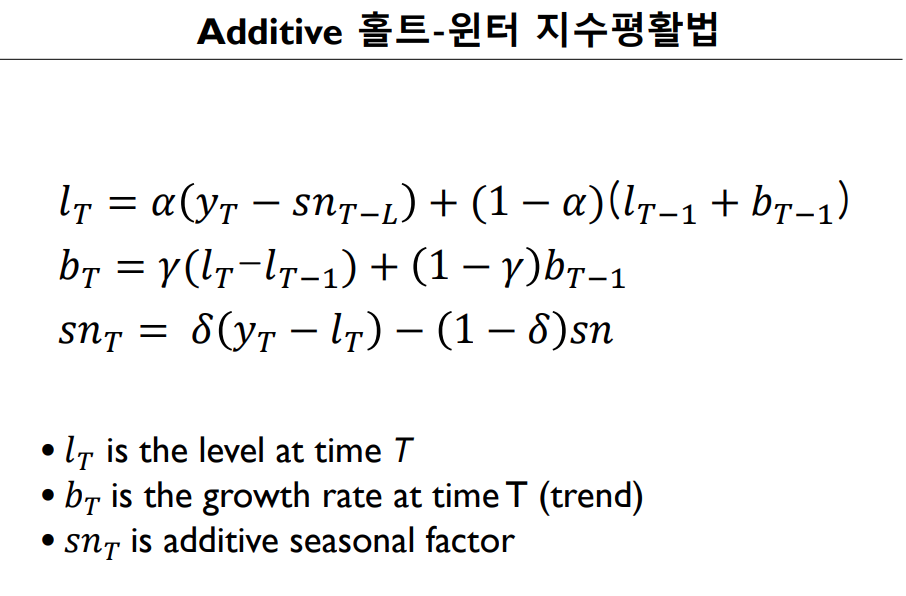

In [46]:
""" 설명 장표 불러오기 """
Image('image/image8.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image8.PNG') ### colab 사용시

In [47]:
""" Addictive 홀트-윈터 지수평활법 모델링 """

"""
optimized=True
 - level, trend, seasonal을 지정하지 않고 최적화된 값 도출 가능
"""

# HW_ADD_model = ExponentialSmoothing(train, trend='add', seasonal='add').fit(smoothing_level=alpha, smoothing_trend=gamma, smoothing_seasonal=delta) ### 개별 파라미터 지정 가능
HW_ADD_model = ExponentialSmoothing(train, trend='add', seasonal='add').fit(optimized=True) ### 파라미터를 컴퓨터가 알아서 최적화
print(HW_ADD_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                      co2   No. Observations:                 1658
Model:             ExponentialSmoothing   SSE                            240.270
Optimized:                         True   AIC                          -3090.600
Trend:                         Additive   BIC                          -2787.452
Seasonal:                      Additive   AICC                         -3086.320
Seasonal Periods:                    52   Date:                 Mon, 03 Mar 2025
Box-Cox:                          False   Time:                         14:21:41
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6050238                alpha                 True
smoothing_trend          

In [48]:
""" Addictive 홀트-윈터 지수평활법 Train 및 Test 기간 예측 """
HW_ADD_train_pred = HW_ADD_model.fittedvalues ### train 기간 적합 결과
HW_ADD_test_pred = HW_ADD_model.forecast(len(test)) ### test 기간 예측 결과

print('Additive Holt-Winter Exponential Smoothing Train Results')
print(HW_ADD_train_pred)
print('-'*30)
print('Additive Holt-Winter Smoothing Test results')
print(HW_ADD_test_pred)

Additive Holt-Winter Exponential Smoothing Train Results
date
1958-03-29    316.386357
1958-04-05    316.609985
1958-04-12    317.158675
1958-04-19    317.778798
1958-04-26    317.872604
                 ...    
1989-12-02    351.799239
1989-12-09    352.170714
1989-12-16    352.387348
1989-12-23    352.485599
1989-12-30    352.803683
Freq: W-SAT, Length: 1658, dtype: float64
------------------------------
Additive Holt-Winter Smoothing Test results
1990-01-06    353.440768
1990-01-13    353.605304
1990-01-20    353.727897
1990-01-27    353.869817
1990-02-03    354.047181
                 ...    
2001-12-01    367.009560
2001-12-08    367.100157
2001-12-15    367.409528
2001-12-22    367.685827
2001-12-29    367.850363
Freq: W-SAT, Length: 626, dtype: float64


In [49]:
""" Addictive 홀트-윈터 지수평활법 평가 """
print(f'MSE: {np.round(mean_squared_error(test, HW_ADD_test_pred), 2)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test, HW_ADD_test_pred)), 2)}')
print(f'MAE: {np.round(mean_absolute_error(test, HW_ADD_test_pred), 2)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(test, HW_ADD_test_pred), 2)}')
print(f'R2 score: {np.round(r2_score(test, HW_ADD_test_pred), 2)}')

MSE: 6.33
RMSE: 2.52
MAE: 1.95
MAPE: 0.53
R2 score: 0.82


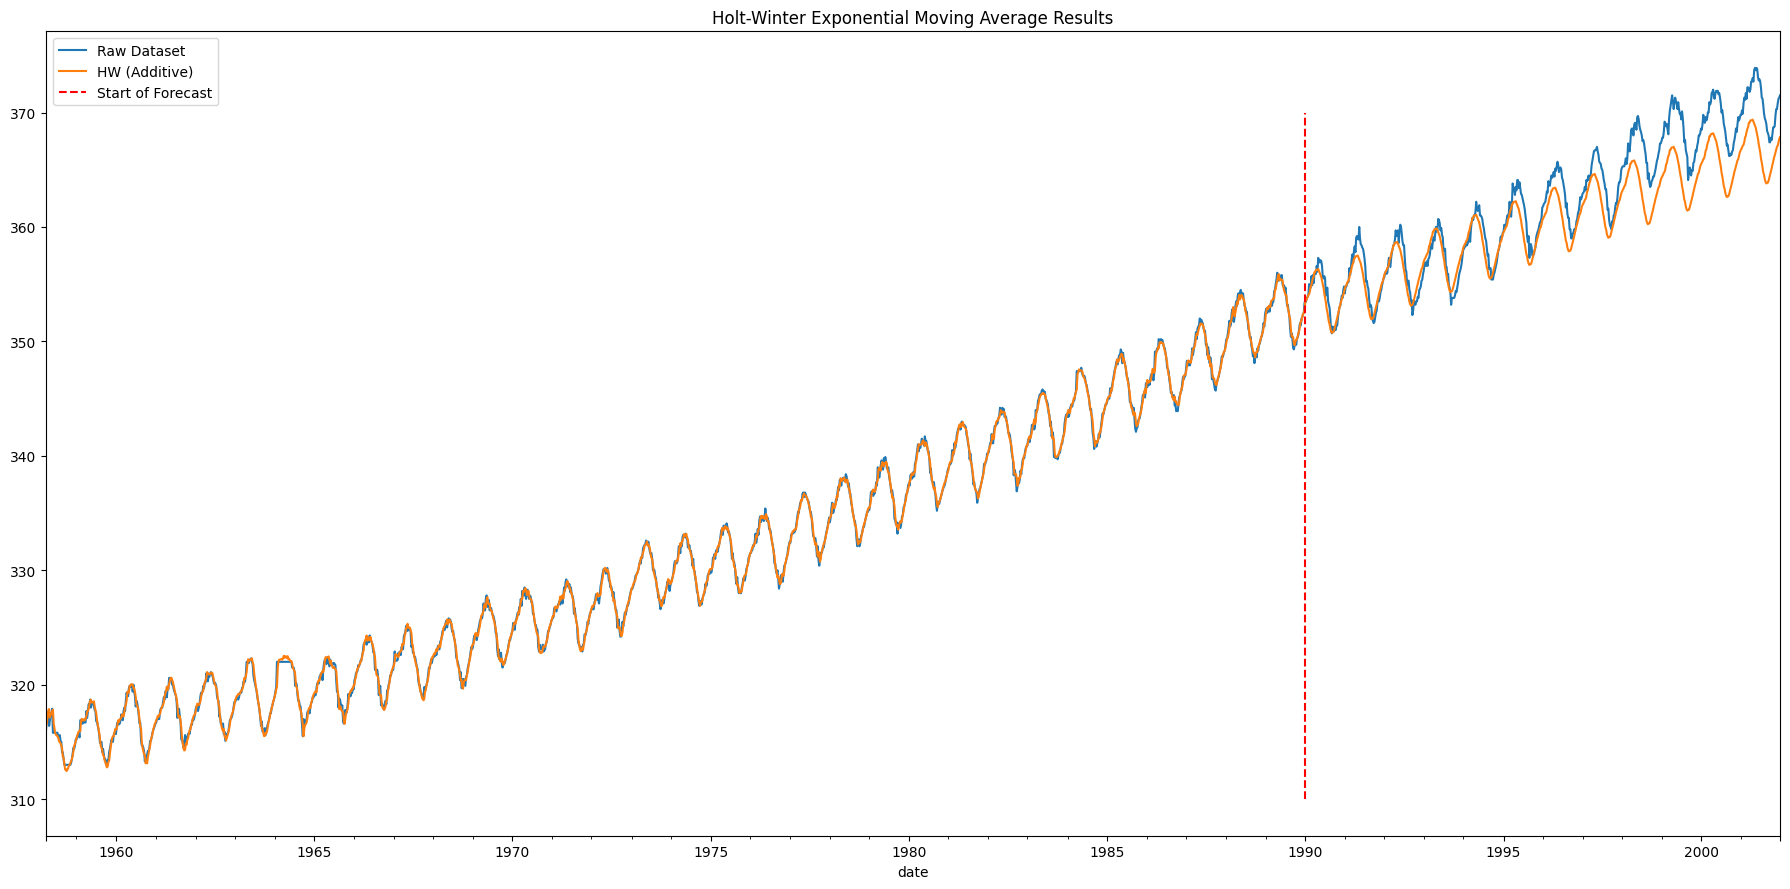

In [50]:
""" Addictive 홀트-윈터 지수평활법 시각화 """
HW_ADD_train_visualization_df = pd.DataFrame(HW_ADD_train_pred, columns=['HW_ADD'])
HW_ADD_test_visualization_df = pd.DataFrame(HW_ADD_test_pred, index=test.index, columns=['HW_ADD'])
HW_ADD_total_visualization_df = pd.concat([HW_ADD_train_visualization_df, HW_ADD_test_visualization_df], axis=0)

fig, ax = plt.subplots(figsize=(18, 9))
data.plot(ax=ax) ### 기존 전체 데이터 시각화
HW_ADD_total_visualization_df.plot(ax=ax, label = 'Prediction (Additive)') ### Addictive 홀트-윈터 지수평활법 예측값 시각화

ax.vlines(test.index[0], ymin=310, ymax=370, linestyle='--', color='r') ### train/test 분리 시점 시각화
ax.legend(['Raw Dataset', 'HW (Additive)', 'Start of Forecast'], loc='upper left')
plt.title('Holt-Winter Exponential Moving Average Results')
plt.tight_layout()
plt.show()

**2-4-2. Multiplicative 홀트-윈터 지수평활법**
 - "추세 + 계절성(산포 변동)" 반영

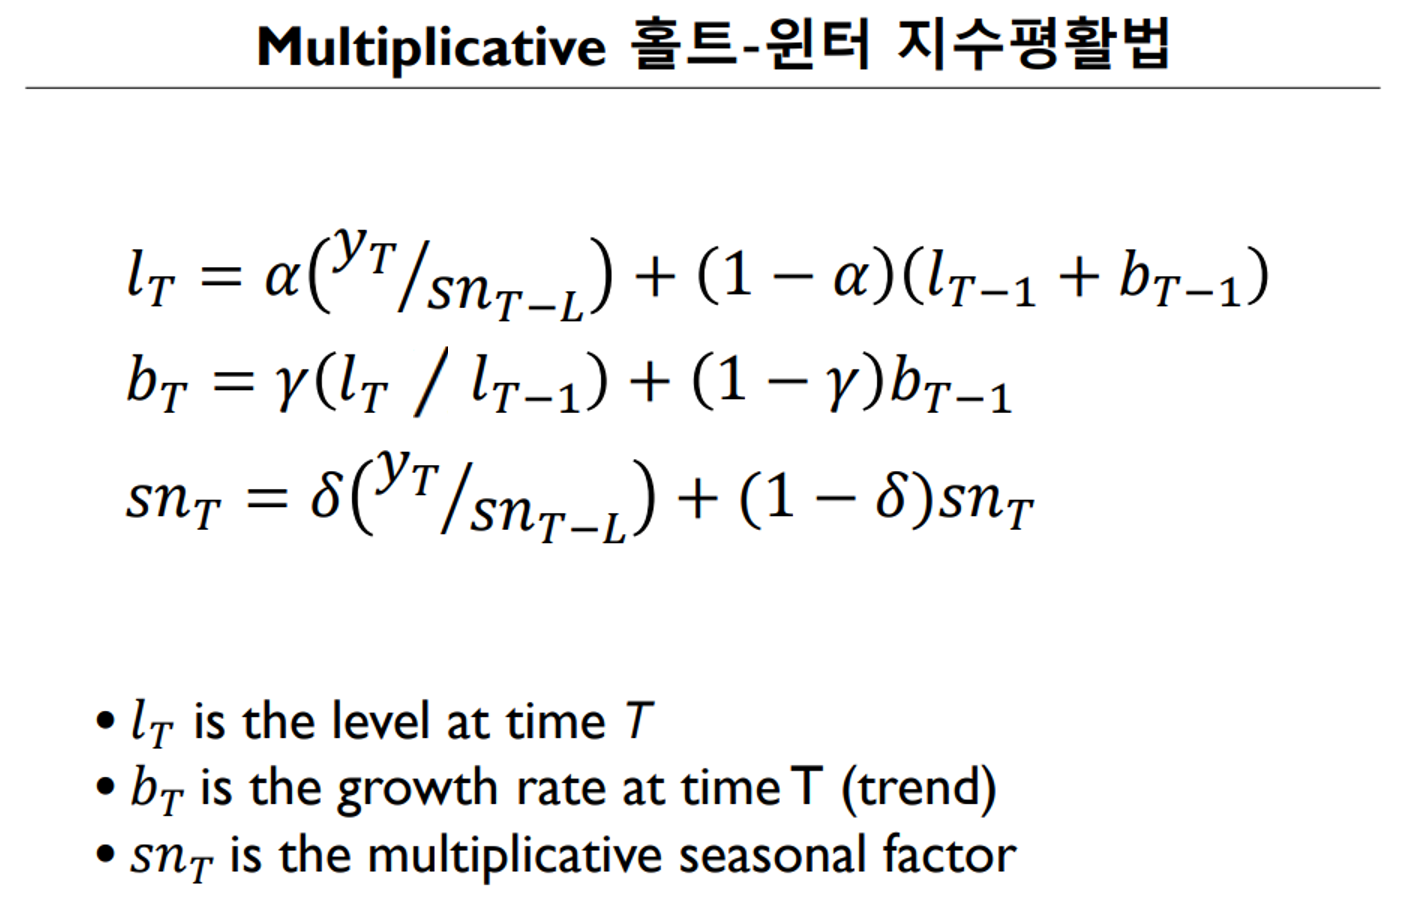

In [51]:
""" 설명 장표 불러오기 """
Image('image/image9.PNG') ### 로컬 사용시
# Image('/content/2025-LGElec-Day4/image/image9.PNG') ### colab 사용시

In [52]:
""" Multiplicative 홀트-윈터 지수평활법 모델링 """
HW_MUL_model = ExponentialSmoothing(train, trend='mul', seasonal='mul').fit(optimized=True)
print(HW_MUL_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                      co2   No. Observations:                 1658
Model:             ExponentialSmoothing   SSE                            239.347
Optimized:                         True   AIC                          -3096.984
Trend:                   Multiplicative   BIC                          -2793.836
Seasonal:                Multiplicative   AICC                         -3092.704
Seasonal Periods:                    52   Date:                 Mon, 03 Mar 2025
Box-Cox:                          False   Time:                         14:21:41
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5968102                alpha                 True
smoothing_trend          

In [53]:
""" Multiplicative 홀트-윈터 지수평활법 Train 및 Test 기간 예측 """
HW_MUL_train_pred = HW_MUL_model.fittedvalues
HW_MUL_test_pred = HW_MUL_model.forecast(len(test))

print('Multiplicative Holt-Winter Exponential Smoothing Train Results')
print(HW_MUL_train_pred)
print('-'*30)
print('Multiplicative Holt-Winter Smoothing Test results')
print(HW_MUL_test_pred)

Multiplicative Holt-Winter Exponential Smoothing Train Results
date
1958-03-29    316.378351
1958-04-05    316.586329
1958-04-12    317.134771
1958-04-19    317.749949
1958-04-26    317.852257
                 ...    
1989-12-02    351.831495
1989-12-09    352.197822
1989-12-16    352.415591
1989-12-23    352.501702
1989-12-30    352.832703
Freq: W-SAT, Length: 1658, dtype: float64
------------------------------
Multiplicative Holt-Winter Smoothing Test results
1990-01-06    353.465612
1990-01-13    353.638078
1990-01-20    353.767067
1990-01-27    353.924879
1990-02-03    354.110837
                 ...    
2001-12-01    368.294809
2001-12-08    368.394527
2001-12-15    368.741514
2001-12-22    369.048831
2001-12-29    369.228900
Freq: W-SAT, Length: 626, dtype: float64


In [54]:
""" Multiplicative 홀트-윈터 지수평활법 평가 """
print(f'MSE: {np.round(mean_squared_error(test, HW_MUL_test_pred), 2)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test, HW_MUL_test_pred)), 2)}')
print(f'MAE: {np.round(mean_absolute_error(test, HW_MUL_test_pred), 2)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(test, HW_MUL_test_pred), 2)}')
print(f'R2 score: {np.round(r2_score(test, HW_MUL_test_pred), 2)}')

MSE: 3.64
RMSE: 1.91
MAE: 1.46
MAPE: 0.4
R2 score: 0.89


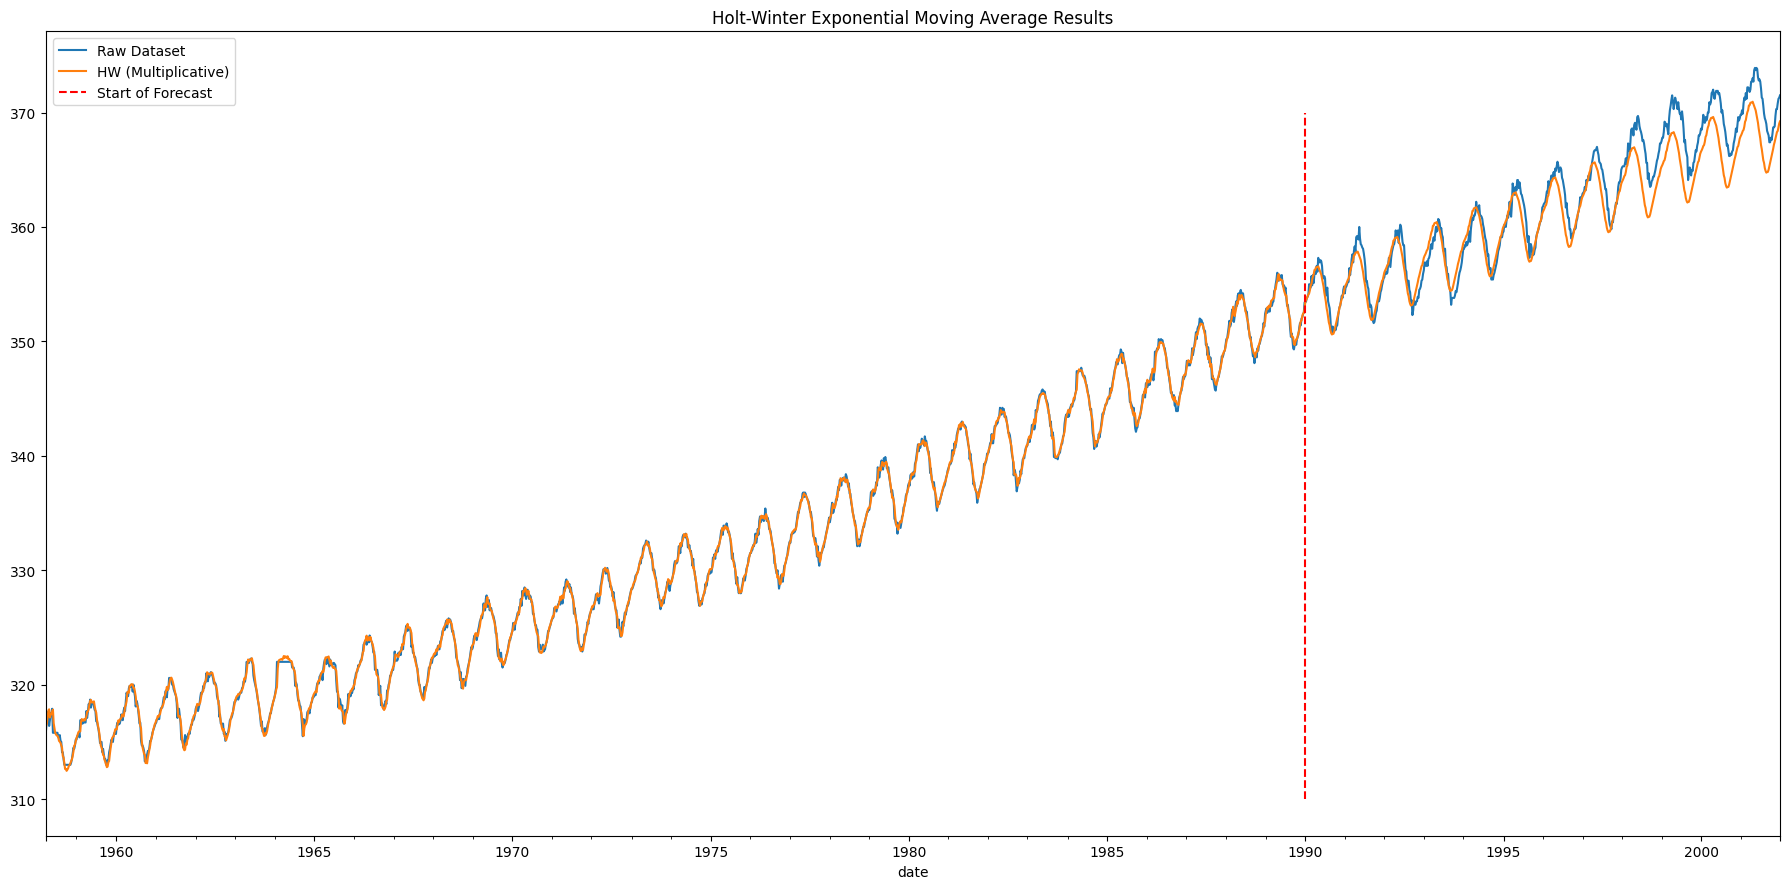

In [55]:
""" Multiplicative 홀트-윈터 지수평활법 시각화 """
HW_MUL_train_visualization_df = pd.DataFrame(HW_MUL_train_pred, columns=['HW_MUL'])
HW_MUL_test_visualization_df = pd.DataFrame(HW_MUL_test_pred, index=test.index, columns=['HW_MUL'])
HW_MUL_total_visualization_df = pd.concat([HW_MUL_train_visualization_df, HW_MUL_test_visualization_df], axis=0)

fig, ax = plt.subplots(figsize=(18, 9))
data.plot(ax=ax) ### 기존 전체 데이터 시각화
HW_MUL_total_visualization_df.plot(ax=ax, label = 'Prediction (Multiplicative)') ### Addictive 홀트-윈터 지수평활법 예측값 시각화

ax.vlines(test.index[0], ymin=310, ymax=370, linestyle='--', color='r') ### train/test 분리 시점 시각화
ax.legend(['Raw Dataset', 'HW (Multiplicative)', 'Start of Forecast'], loc='upper left')
plt.title('Holt-Winter Exponential Moving Average Results')
plt.tight_layout()
plt.show()

# **EOD**